In [1]:
import matplotlib.pyplot as plt
import torch
from utils.graphs import superpixels_to_2d_image
from DataModules import MNISTSuperpixelDataModule
from torch_geometric.utils import to_dense_adj, dense_to_sparse
from torch_geometric.data import Data

cuda_available = torch.cuda.is_available()
print(f"Cuda available: {cuda_available}")
device = torch.device("cuda" if cuda_available else "cpu")


MNIST_PATH = "../datasets/MNISTSuperpixel"

/home/mancio/git/ebm-molecules/.venv/lib/python3.12/site-packages/torch_geometric/typing.py:68: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: /home/mancio/git/ebm-molecules/.venv/lib/python3.12/site-packages/libpyg.so: undefined symbol: _ZN5torch8autograd12VariableInfoC1ERKN2at6TensorE
  warnings.warn(f"An issue occurred while importing 'pyg-lib'. "
/home/mancio/git/ebm-molecules/.venv/lib/python3.12/site-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /home/mancio/git/ebm-molecules/.venv/lib/python3.12/site-packages/torch_scatter/_scatter_cuda.so: undefined symbol: _ZN2at4_ops16div__Tensor_mode4callERNS_6TensorERKS2_St8optionalIN3c1017basic_string_viewIcEEE
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/home/mancio/git/ebm-molecules/.venv/lib/python3.12/site-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred w

Cuda available: True


In [2]:
data_module = MNISTSuperpixelDataModule(MNIST_PATH)
data_module.setup("fit")
data_loader = data_module.train_dataloader()

/home/mancio/git/ebm-molecules/.venv/lib/python3.12/site-packages/torch_geometric/data/dataset.py:240: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, pass `force_reload=True` explicitly to reload the dataset.
  warnings.warn(


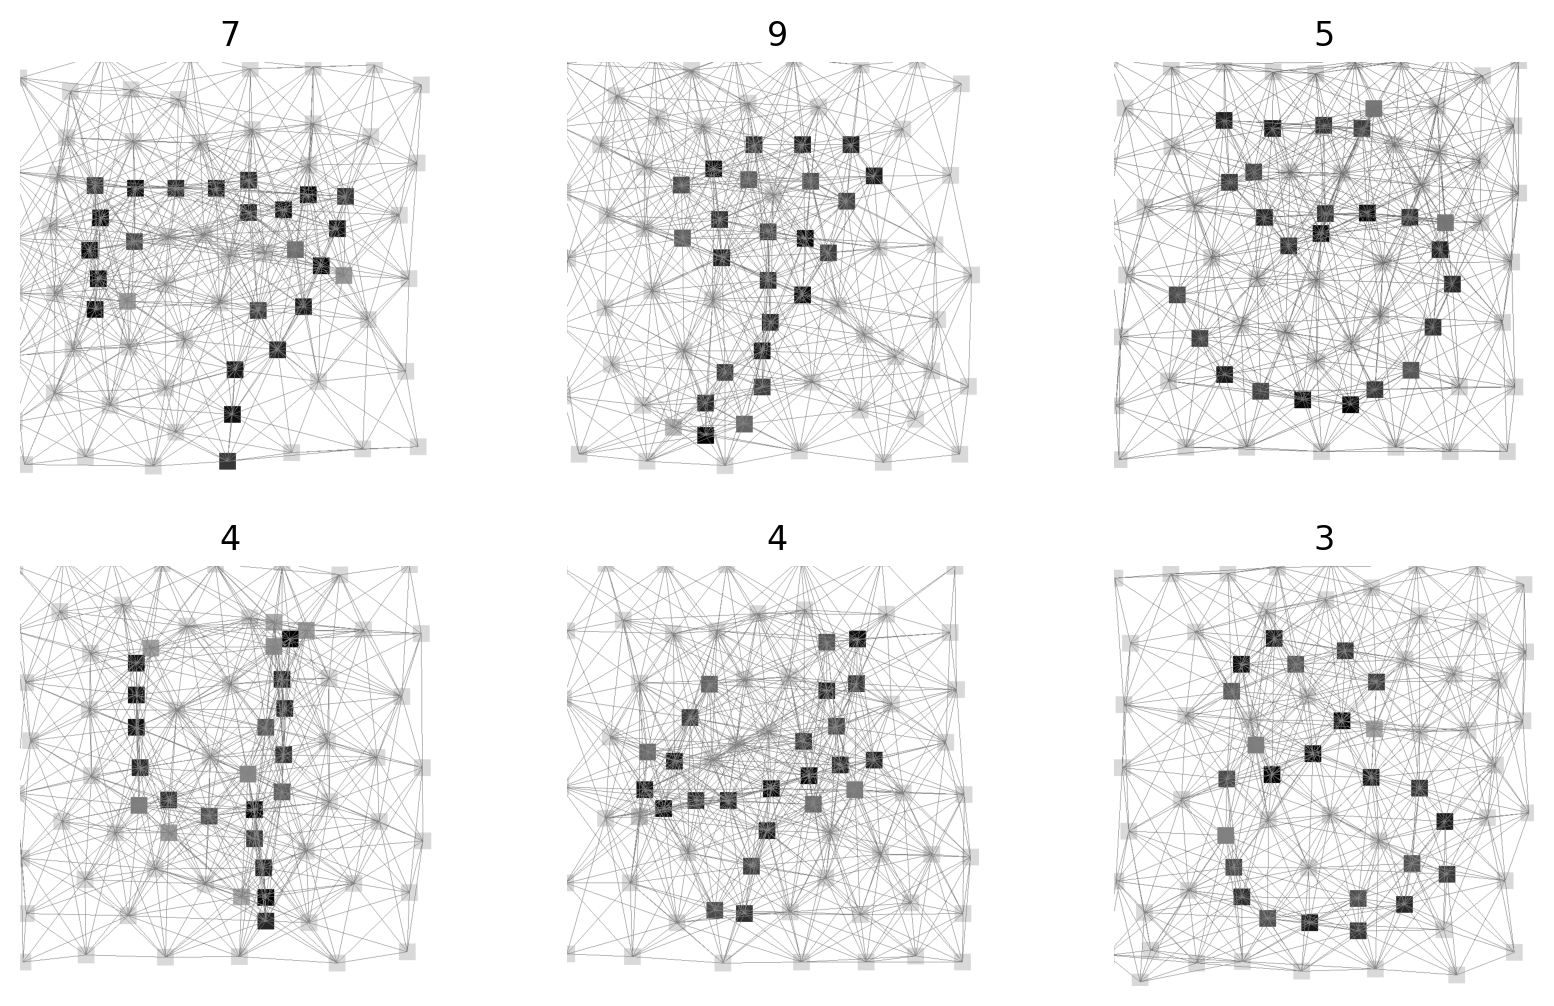

In [3]:
fig, axes = plt.subplots(2, 3, figsize=(10, 6), dpi=200)
axes = axes.flatten()
data_loader_iter = iter(data_loader)
batch = next(data_loader_iter)
for i in range(len(axes)):
    image = superpixels_to_2d_image(batch[i])
    axes[i].imshow(image, cmap=plt.cm.binary)
    axes[i].axis("off")
    axes[i].set_title(f"{batch[i].y.item()}")
plt.show()

In [7]:
batch = next(data_loader_iter)
for g in batch[:1]:
    print(g.edge_index)
    adj = to_dense_adj((g.edge_index))
    assert torch.equal(g.edge_index, (dense_to_sparse(adj)[0]))

batch[0]

tensor([[ 0,  0,  0,  ..., 74, 74, 74],
        [ 5,  8, 13,  ..., 61, 62, 73]])


Data(x=[75, 1], edge_index=[2, 1407], y=[1], pos=[75, 2], edge_attr=[1407, 2])

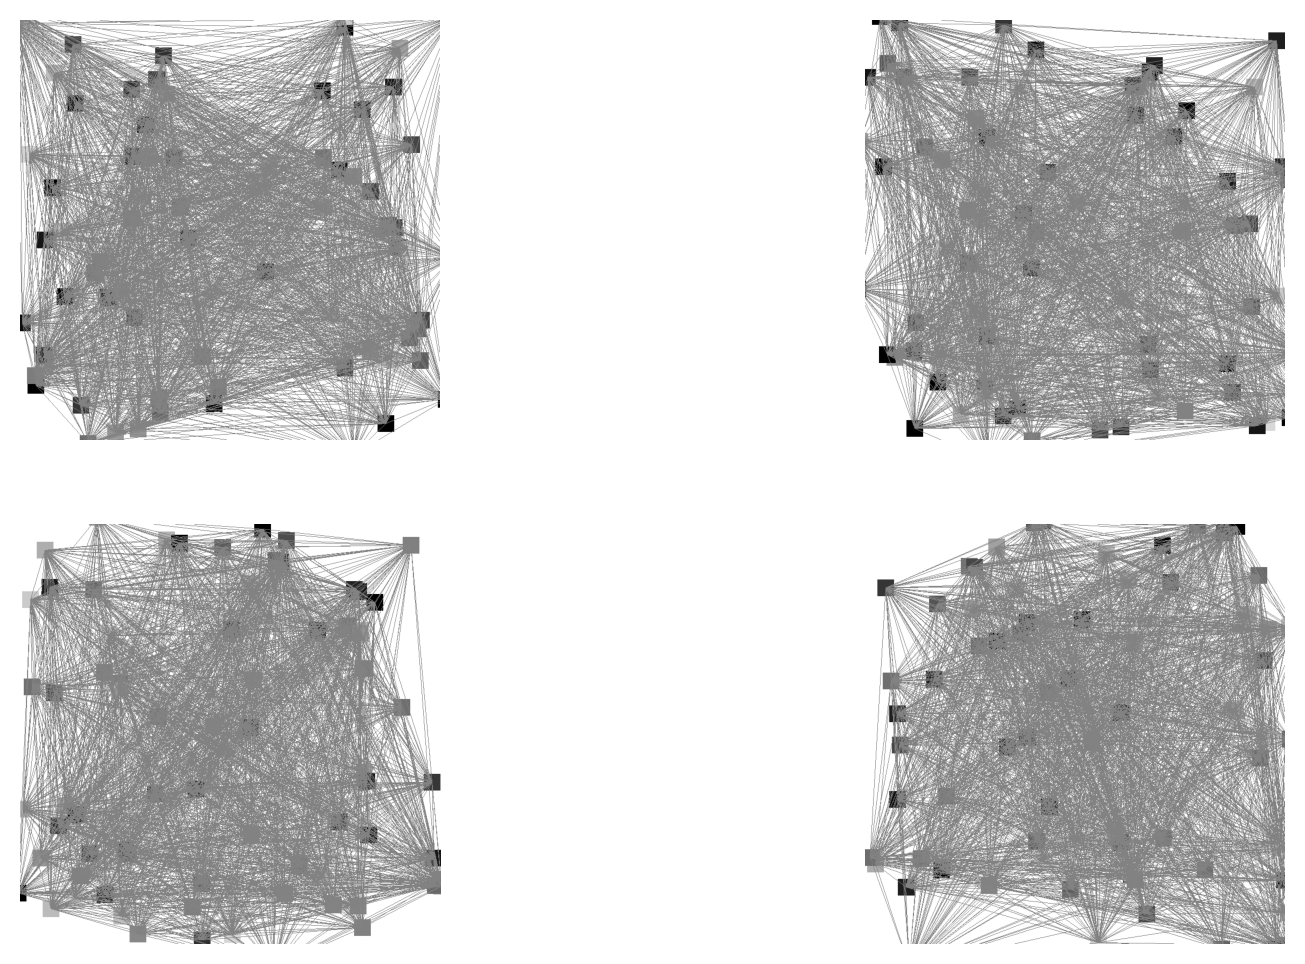

In [11]:
def generate_random_graph(n_nodes: int = 75, n_edge_feature: int = 2) -> Data:
    x: torch.Tensor = torch.rand((n_nodes, 1))    
    edge_index: torch.Tensor = dense_to_sparse(torch.randint(0, 2, (n_nodes, n_nodes), dtype=torch.int64))[0]
    pos: torch.Tensor = torch.rand((n_nodes, 2)) * 28
    edge_attr: torch.Tensor = torch.rand((edge_index.shape[1], n_edge_feature))
    return Data(x=x, edge_index=edge_index, pos=pos, edge_attr=edge_attr)

generate_random_graph()


fig, axes = plt.subplots(2, 2, figsize=(10, 6), dpi=200)
axes = axes.flatten()
for i in range(len(axes)):
    image = superpixels_to_2d_image(generate_random_graph())
    axes[i].imshow(image, cmap=plt.cm.binary)
    axes[i].axis("off")
plt.show()